In [ ]:
#This program is to create a google cloud network graph representation.
#it creates the graph, prints it, and then serealizes 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.DiGraph()
g.clear()

In [22]:
#loading in nodes
g.add_nodes_from([("user", {'pos':[0.5, 1]}), 
                  ("loadgenerator", {'pos':(0.65, 1)}), 
                  ("frontend", {'pos':(0.5, 0.85)}), 
                  ("checkout", {'pos':(0.65, 0.85)}), 
                  ("ad", {'pos':(0.1, 0.6)}), 
                  ("recommendation",{'pos':(0.3, 0.6)}), 
                  ("payment",{'pos':(0.75, 0.6)}), 
                  ("email",{'pos':(0.9,0.6)}), 
                  ("productcatalog",{'pos':(0.3,0.45)}), 
                  ("shipping",{'pos':(0.6,0.45)}), 
                  ("currency",{'pos':(0.75,0.45)}), 
                  ("cart",{'pos':(0.5,0.35)}), 
                  ("rediscache",{'pos':(0.5,0.1)})])

In [23]:
list(g.nodes)

['user',
 'loadgenerator',
 'frontend',
 'checkout',
 'ad',
 'recommendation',
 'payment',
 'email',
 'productcatalog',
 'shipping',
 'currency',
 'cart',
 'rediscache']

In [24]:
#see picture - this is putting together all of the nodes
g.add_edge("user", "frontend")
g.add_edge("loadgenerator", "frontend")
g.add_edge("frontend", "checkout")
g.add_edge("frontend", "ad")
g.add_edge("frontend", "recommendation")
g.add_edge("frontend", "productcatalog")
g.add_edge("frontend", "cart")
g.add_edge("frontend", "shipping")
g.add_edge("frontend", "currency")
g.add_edge("checkout", "productcatalog")
g.add_edge("checkout", "cart")
g.add_edge("checkout", "shipping")
g.add_edge("checkout", "currency")
g.add_edge("checkout", "payment")
g.add_edge("checkout", "email")
g.add_edge("recommendation", "productcatalog")
g.add_edge("cart", "rediscache")

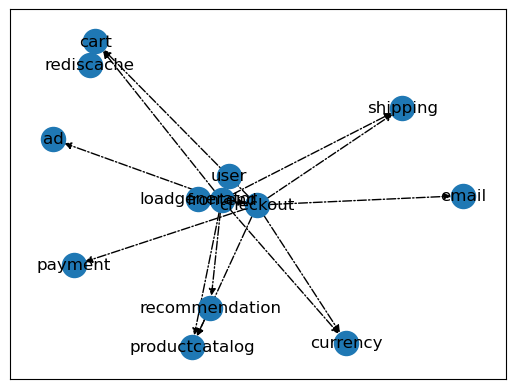

In [25]:
#This is drawing a graph using networkx
import matplotlib.pyplot as plt
subax1 = plt.subplot(111) #none of these numbers can be one
pos = nx.spring_layout(g)
nx.draw_networkx(g, with_labels=True, arrows=True, arrowsize=10, style="-.", pos=pos)

In [26]:
#json creator of g
import json
data1 = nx.node_link_data(g)
s1 = json.dumps(data1) #this creates the JSON serial
print(s1)

{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"pos": [0.5, 1], "id": "user"}, {"pos": [0.65, 1], "id": "loadgenerator"}, {"pos": [0.5, 0.85], "id": "frontend"}, {"pos": [0.65, 0.85], "id": "checkout"}, {"pos": [0.1, 0.6], "id": "ad"}, {"pos": [0.3, 0.6], "id": "recommendation"}, {"pos": [0.75, 0.6], "id": "payment"}, {"pos": [0.9, 0.6], "id": "email"}, {"pos": [0.3, 0.45], "id": "productcatalog"}, {"pos": [0.6, 0.45], "id": "shipping"}, {"pos": [0.75, 0.45], "id": "currency"}, {"pos": [0.5, 0.35], "id": "cart"}, {"pos": [0.5, 0.1], "id": "rediscache"}], "links": [{"source": "user", "target": "frontend"}, {"source": "loadgenerator", "target": "frontend"}, {"source": "frontend", "target": "checkout"}, {"source": "frontend", "target": "ad"}, {"source": "frontend", "target": "recommendation"}, {"source": "frontend", "target": "productcatalog"}, {"source": "frontend", "target": "cart"}, {"source": "frontend", "target": "shipping"}, {"source": "frontend", "target": "currenc

In [20]:
    #plotly is not f-ing happening

In [61]:
edge_x = []
edge_y = []
for edge in g.edges():
    x0, y0 = g.nodes[edge[0]]['pos']
    x1, y1 = g.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in g.nodes():
    x, y = g.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Rainbow',
        reversescale=False,
        color=[],
        size=50,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_text = []

In [62]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Google Cloud Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="made with plenty of pain",
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()